In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

dataFile = pd.read_csv('dataFiles/Fu_multifit.csv')
X = np.array([dataFile['Velocity'],dataFile['L/S']]).T
Y = np.array(dataFile['contact ratio']) / 100

In [2]:
reg = LinearRegression().fit(X,Y)
print(reg.score(X,Y))
reg.coef_

0.8993282506860827


array([0.02007223, 0.21724281])

In [3]:
X1 = [[2.5,0.08]]
plastic = reg.predict(X1)
print(plastic)

[0.05952281]


In [4]:
ratio = plastic/(1-plastic)
print(ratio)
print(reg.predict(X[0:7,:]))

[0.06329001]
[0.18852183 0.21256833 0.25302754 0.30056782 0.31830947 0.34569337
 0.37878411]


Text(0, 0.5, 'Contact ratio')

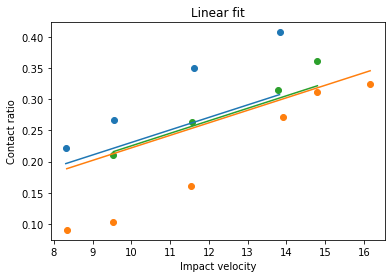

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],reg.predict(X[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],reg.predict(X[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],reg.predict(X[8:12,:]))
plt.title('Linear fit')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

In [6]:
#polynomial regression fit
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=False)
X_poly = poly.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf = LinearRegression()
clf.fit(X_poly,Y)
mul_coeff = clf.coef_
print(clf.score(X_poly,Y))
print(mul_coeff)

0.9919677571129205
[ 0.00000000e+00  1.70578279e-02 -4.28364632e+00 -3.50458587e-04
  1.64273909e-01  2.00403193e+01]


Text(0, 0.5, 'Contact ratio')

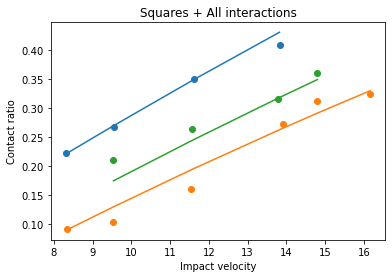

In [7]:
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf.predict(X_poly[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf.predict(X_poly[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf.predict(X_poly[8:12,:]))
plt.title('Squares + All interactions')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

0.9890250440724381
[ 0.         -0.0267725  -0.92390284  0.40204208]


Text(0, 0.5, 'Contact ratio')

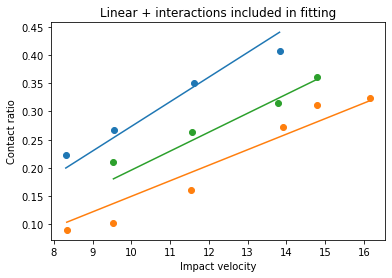

In [16]:
poly1 = PolynomialFeatures(2,interaction_only=True)
X_poly1 = poly1.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf1 = LinearRegression()
clf1.fit(X_poly1,Y)
mul_coeff = clf1.coef_
print(clf1.score(X_poly1,Y))
print(mul_coeff)
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf1.predict(X_poly1[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf1.predict(X_poly1[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf1.predict(X_poly1[8:12,:]))
plt.title('Linear + interactions included in fitting')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

In [9]:
datafile = pd.read_csv('dataFiles/test_data1_WithOutputs_withCalculatedValues.csv')
from HelperTools import DataCompletionMethods
# datafile = pd.read_csv('dataFiles/pls_200points_MRT_torqueAdded.csv')
dcm_object = DataCompletionMethods.DataCompletionMethods(datafile)
[Vfree,Vmax] = dcm_object.vFreeCalculation(datafile['Granulator diameter (mm)'],datafile)
datafile['Vol free'] = Vfree
datafile['Vol max'] = Vmax
numer = (datafile['DetTorque']*datafile['RPM']) / (60*datafile['FlowRate (kg/hr)']*datafile['DetMRT']*(datafile['Vol free']/datafile['Vol max']))
# numer = (datafile['DetTorque']*datafile['RPM (1/s)']) / (60*datafile['FlowRate (kg/hr)']*datafile['DetMRT']*(datafile['Vol free']/datafile['Vol max']))
datafile['velocity'] = np.sqrt(4*np.pi*np.array(numer))   
velocity = datafile['velocity']
lsratio = datafile['L/S Ratio']
inputframes = [velocity,lsratio]
inputframes = pd.concat(inputframes,axis=1)
X_poly_new = poly1.fit_transform(inputframes)
pre = np.abs(clf1.predict(X_poly_new))
ratio = pre/(1-pre)
print(ratio)
poly1.get_feature_names(inputframes.columns)

[0.07612404 0.07499532 0.07405287 0.07632729 0.07606822 0.07520358
 0.07593874 0.07706814 0.07639135 0.08299212 0.08050745 0.07866271
 0.08314074 0.08263509 0.08118817 0.0833455  0.08441597 0.08352989
 0.08888399 0.08642223 0.08443558 0.09022899 0.08938193 0.08829719
 0.08965788 0.09056379 0.09081043 0.0747614  0.0735087  0.07243506
 0.07871483 0.07686312 0.07593483 0.07536932 0.07563773 0.07435765
 0.08077525 0.07894789 0.07732397 0.08109184 0.08144037 0.07993252
 0.07890706 0.08106913 0.08031934 0.08679438 0.08439485 0.08197999
 0.08548306 0.08615967 0.08470551 0.08560828 0.08587386 0.08673134
 0.1218947  0.12820973 0.02929051 0.13417776 0.13816574 0.07612762
 0.13676404 0.16541944 0.1391282  0.17103058 0.20974962 0.32127109
 0.20053665 0.22430079 0.28458821 0.17728605 0.21838329 0.31124631
 0.08571279 0.09481218 0.08085224 0.08932039 0.08165368 0.0912118
 0.09412364 0.082529   0.08818571 0.08892462 0.08827638 0.07697544
 0.08467812 0.08921637 0.07617073 0.05631724 0.04384049 0.02481

['1', 'velocity', 'L/S Ratio', 'velocity L/S Ratio']

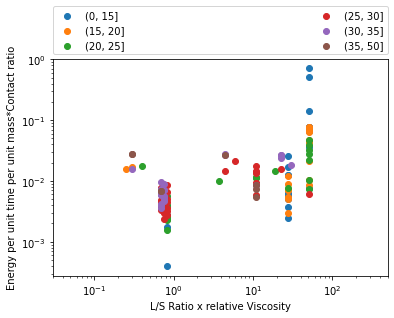

In [10]:
fig,ax = plt.subplots()
datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
datafile['Extent of gran'] = np.divide(datafile['final d50'],datafile['Initial d50'])
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass*Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.yticks([1e-3,1e-2,1e-1,1])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [11]:
X_poly_new = poly.fit_transform(inputframes)
pre = np.abs(clf.predict(X_poly_new))
ratio = pre/(1-pre)
print(ratio)
poly.get_feature_names(inputframes.columns)

[ 0.24115453  0.23293896  0.22617553  0.2426475   0.24074521  0.2344453
  0.23979701  0.24812481  0.24311886  0.24978031  0.23886647  0.23088936
  0.25043941  0.24819994  0.24183702  0.25134859  0.25612391  0.25216849
  0.25049423  0.24258726  0.23627193  0.25485276  0.25210462  0.24860123
  0.25299869  0.25594195  0.25674546  0.2312521   0.2223097   0.21476539
  0.26050214  0.24660342  0.23976841  0.23564707  0.23759928  0.22835332
  0.24003337  0.23211567  0.22516623  0.24141576  0.24294131  0.23636899
  0.23193991  0.24131649  0.23804818  0.24377675  0.23614309  0.22854579
  0.23959449  0.24174926  0.23712662  0.23999275  0.24083824  0.24357511
  1.75297661  1.72699365  2.24796537  1.70313094  1.68754648  1.96726278
  1.6929918   1.5881716   1.68382759  0.33039672  1.44917177 -2.75158156
  0.30208814  1.40865729 -2.71191391  0.32418123  1.4248595  -2.74077698
  0.22374572  0.24673495  0.21173963  0.23277918  0.2137064   0.23755758
  0.24497154  0.21586025  0.22992658  0.23178303  0.

['1',
 'velocity',
 'L/S Ratio',
 'velocity^2',
 'velocity L/S Ratio',
 'L/S Ratio^2']

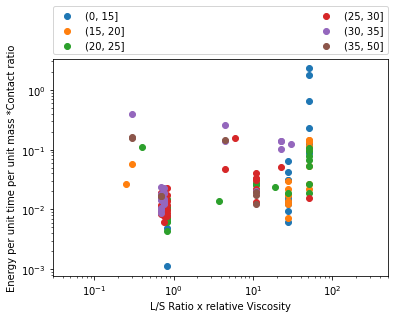

In [12]:
fig,ax = plt.subplots()
datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass *Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

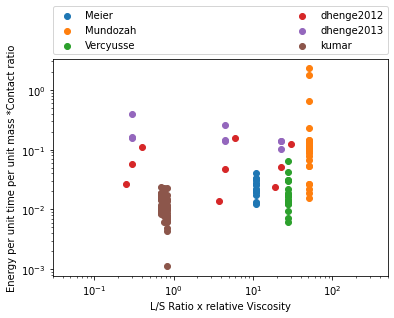

In [17]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
numer = np.array(numer)
lsratio = np.array(lsratio)
exp = np.array(datafile['Experiments'])
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(lsratio[i]*vis[i],numer[i]*pre[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
# plt.ylabel('Contact energy')
plt.ylabel('Energy per unit time per unit mass *Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

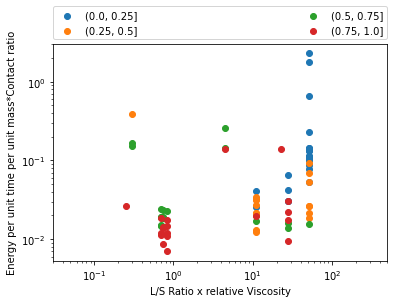

In [18]:
fig,ax = plt.subplots()
datafile['numer'] = numer*pre
ranges = [0,0.25,0.5,0.75,1]
datafile['Calc Fill level'] = dcm_object.fillLevel_osorio(datafile['DetMRT'])
groups = datafile.groupby(pd.cut(datafile['Calc Fill level'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass*Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
# plt.yticks([,1e-1,1,1e1])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)